# EDA and Classification

## Load Package

In [240]:
import pandas as pd
import numpy as np
# import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Load Dataset

In [241]:
df = pd.read_csv('D:/student/Placement_Data_Full_Class.csv', encoding='utf-8-sig')
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Detail Information of Dataset

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [243]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [244]:
df.set_index(df['sl_no'], inplace=True)
df.drop('sl_no', axis=1, inplace=True)
df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [245]:
def column_to_lower_case(df:pd.DataFrame):
    lower_cols = list()
    for col in df.columns:
        lower_cols.append(col.lower())
    df.columns = lower_cols

In [246]:
column_to_lower_case(df)

## Pandas Profiling Report

In [247]:
# df.profile_report()

In [248]:
numeric_cols = df.describe().columns
numeric_cols = numeric_cols.tolist()
numeric_cols

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [249]:
categorical_cols = list()
for col in df.columns:
    if col not in numeric_cols:
        categorical_cols.append(col)
categorical_cols

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [250]:
for col in categorical_cols:
    print('{} unique value count : {}'.format(col, len(df[col].value_counts())))

gender unique value count : 2
ssc_b unique value count : 2
hsc_b unique value count : 2
hsc_s unique value count : 3
degree_t unique value count : 3
workex unique value count : 2
specialisation unique value count : 2
status unique value count : 2


## Visualization

### Numeric Features

#### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F95E330C8>,
      dtype=object)

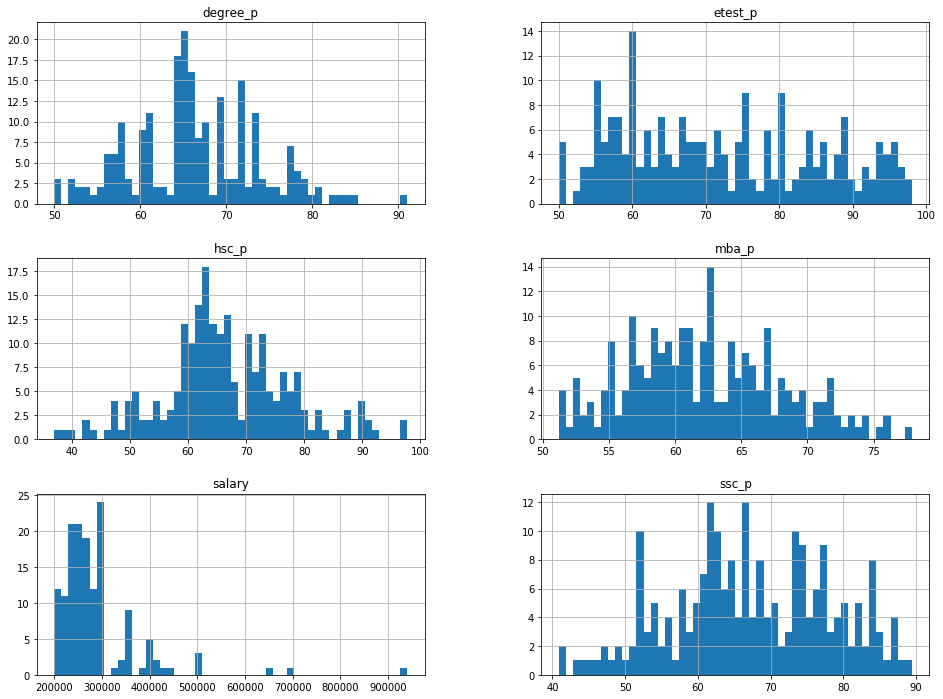

In [251]:
df[numeric_cols].hist(bins=50, figsize=(16, 12))

#### Boxplot

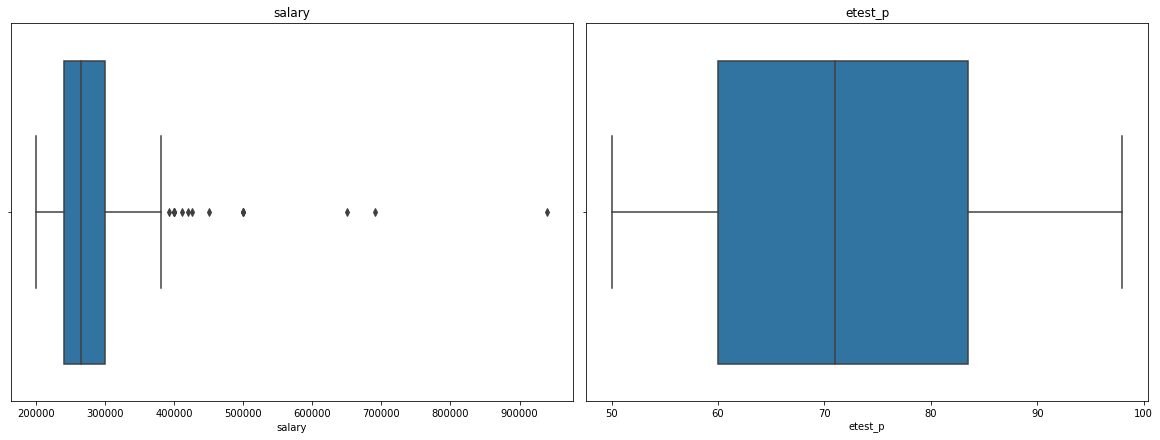

In [252]:
fig = plt.figure(constrained_layout=True, figsize=(16, 6))
grid = gridspec.GridSpec(ncols=6, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, :3])
ax1.set_title('salary')
sns.boxplot(df['salary'])

ax1 = fig.add_subplot(grid[0, 3:6])
ax1.set_title('etest_p')
sns.boxplot(df['etest_p'])

### Categorical Features

In [253]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                      data=df,
                      hue=hue,
                      ax=j,
                      order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        total = float(len(df[i]))
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
            
        plt.tight_layout()

#### Barplot

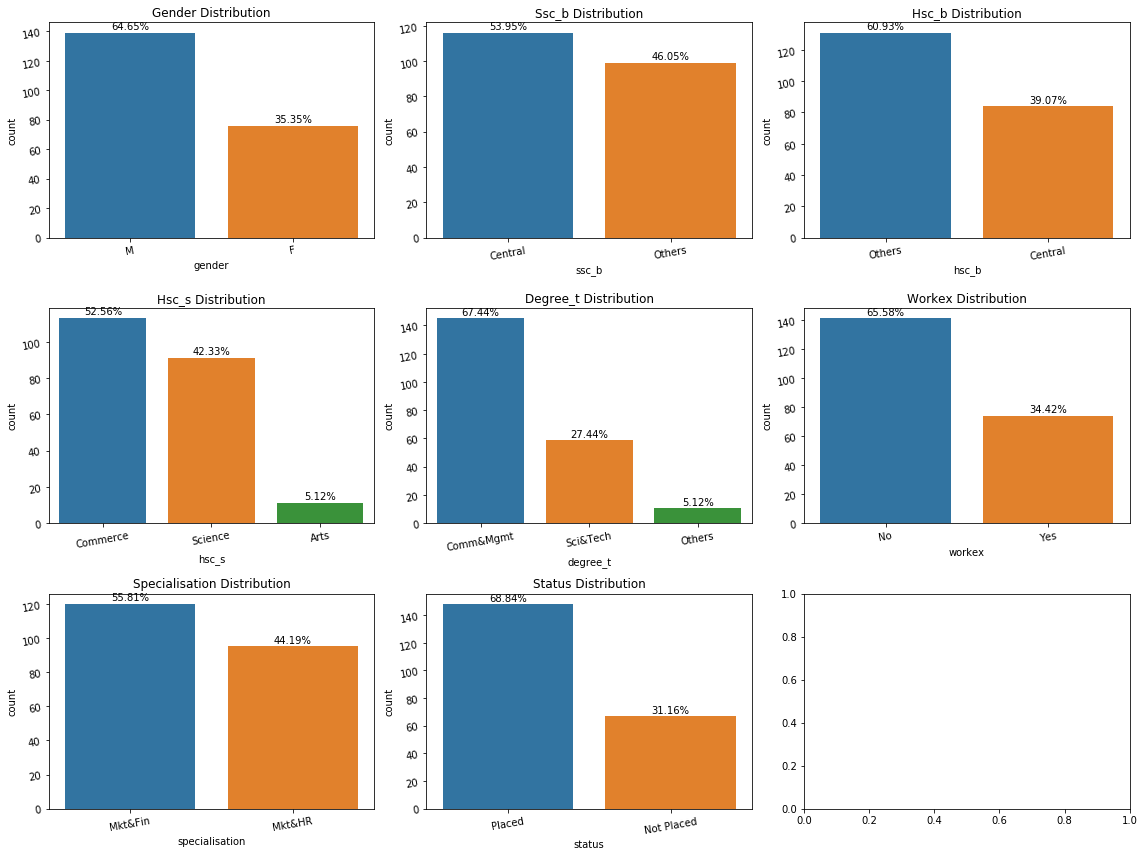

In [254]:
ctg_dist(df, categorical_cols)

### Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F97CF3908>,
      dtype=object)

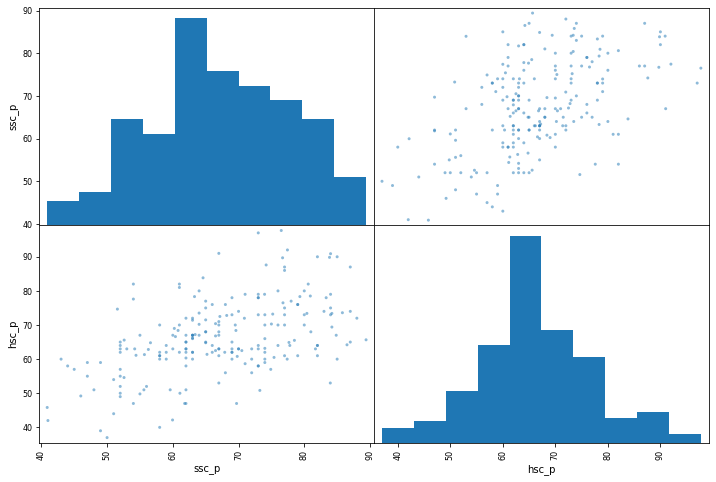

In [255]:
'''Based on Pandas Profiling Report Heatmap'''

corr_cols = ['status', 'ssc_p', 'hsc_p']
scatter_matrix(df[corr_cols], figsize=(12, 8))

### Bivariate Analysis

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


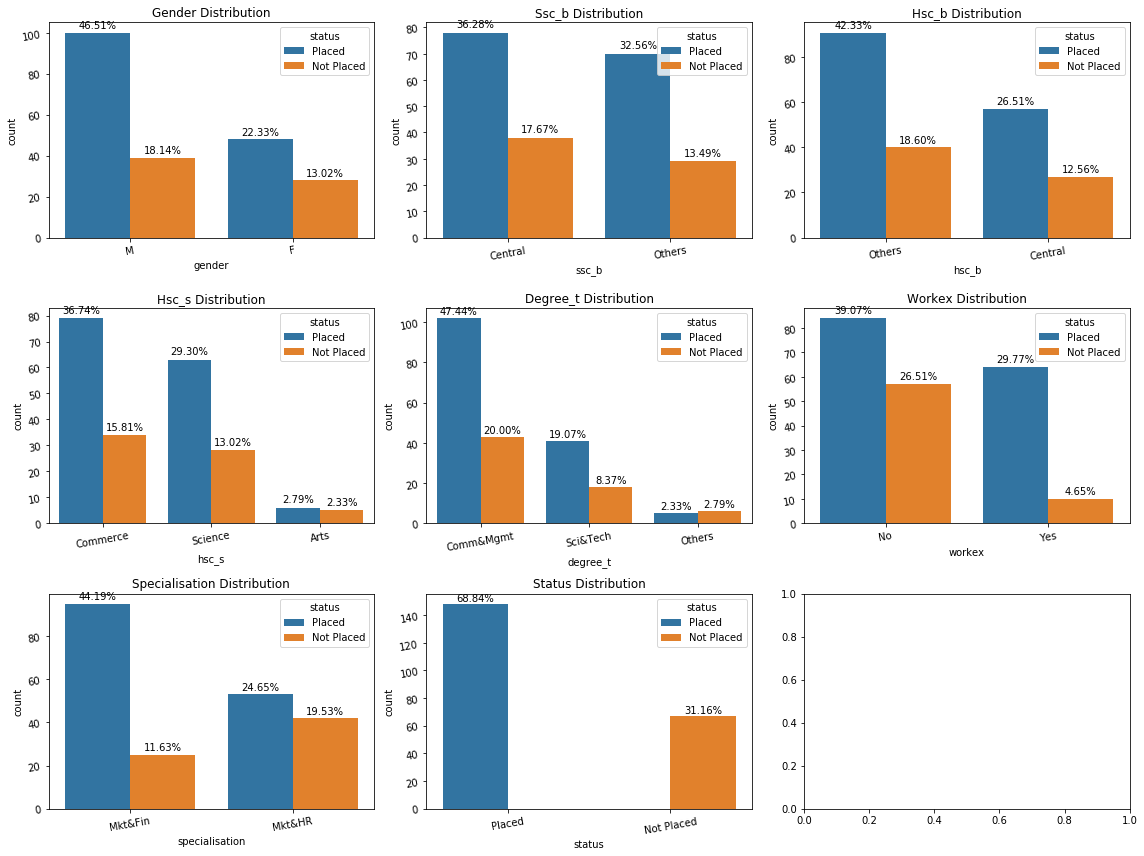

In [256]:
'''Between Status and other Categorical cols'''

ctg_dist(df, categorical_cols, 'status')

## Preprocessing

In [257]:
df.reset_index(drop=True, inplace=True)
df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Refinement

#### Missing Value

In [258]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [259]:
'''Fill Median Value'''
median = df['salary'].median()
print(median)
df['salary'].fillna(median, inplace=True)

265000.0


In [260]:
df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#### Text Value

In [261]:
'''Drop Less Relative Columns'''
df.drop(['ssc_b', 'hsc_b'], axis=1, inplace=True)
df.head(5)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [262]:
data_clf = df.copy()
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p']]
y = data_clf['status']

In [263]:
'''One Hot Encoding Automaticllay on Categorical Columns'''
X = pd.get_dummies(X)
X.head(5)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,0,1,0,0,1,0,0,1,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,0,1,0,1,0,1,0,0,1,0,1,0


#### Feature Sacling

In [264]:
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)

In [265]:
scaled_X[:5]

array([[-0.02808697,  2.2688123 , -1.14010225, -1.29109087, -0.59764672,
        -0.73943397,  0.73943397, -0.23221018,  0.95008151, -0.85666269,
        -1.43924583, -0.23221018,  1.62605898,  0.72444647, -0.72444647,
        -1.12390297,  1.12390297],
       [ 1.11336869,  1.10344799,  1.51326671,  1.08715679,  0.6876202 ,
        -0.73943397,  0.73943397, -0.23221018, -1.05254128,  1.16732059,
        -1.43924583, -0.23221018,  1.62605898, -1.38036423,  1.38036423,
         0.88975652, -0.88975652],
       [-0.21323793,  0.15331275, -0.32284282,  0.21890765, -0.76947385,
        -0.73943397,  0.73943397,  4.30644338, -1.05254128, -0.85666269,
         0.69480833, -0.23221018, -0.61498384,  0.72444647, -0.72444647,
         0.88975652, -0.88975652],
       [-1.04641724, -1.3183391 , -1.95736168, -0.46059169, -0.48939563,
        -0.73943397,  0.73943397, -0.23221018, -1.05254128,  1.16732059,
        -1.43924583, -0.23221018,  1.62605898,  0.72444647, -0.72444647,
        -1.12390297

### Train and Test Split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3)

## Binary Classification

### Load Models

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [268]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [269]:
accuracy_score(y_test, y_pred)

0.8769230769230769

In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       0.69      0.69      0.69        13
      Placed       0.92      0.92      0.92        52

    accuracy                           0.88        65
   macro avg       0.81      0.81      0.81        65
weighted avg       0.88      0.88      0.88        65



In [271]:
# ! pip install eli5

### Check Feature Importance

In [272]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logistic_reg).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.0800 ± 0.0961,x0
0.0646 ± 0.0597,x4
0.0246 ± 0.0151,x6
0.0215 ± 0.0151,x1
0.0154 ± 0.0195,x5
0.0154 ± 0.0389,x10
0.0123 ± 0.0230,x13
0.0123 ± 0.0230,x2
0.0123 ± 0.0123,x9
0.0062 ± 0.0151,x8


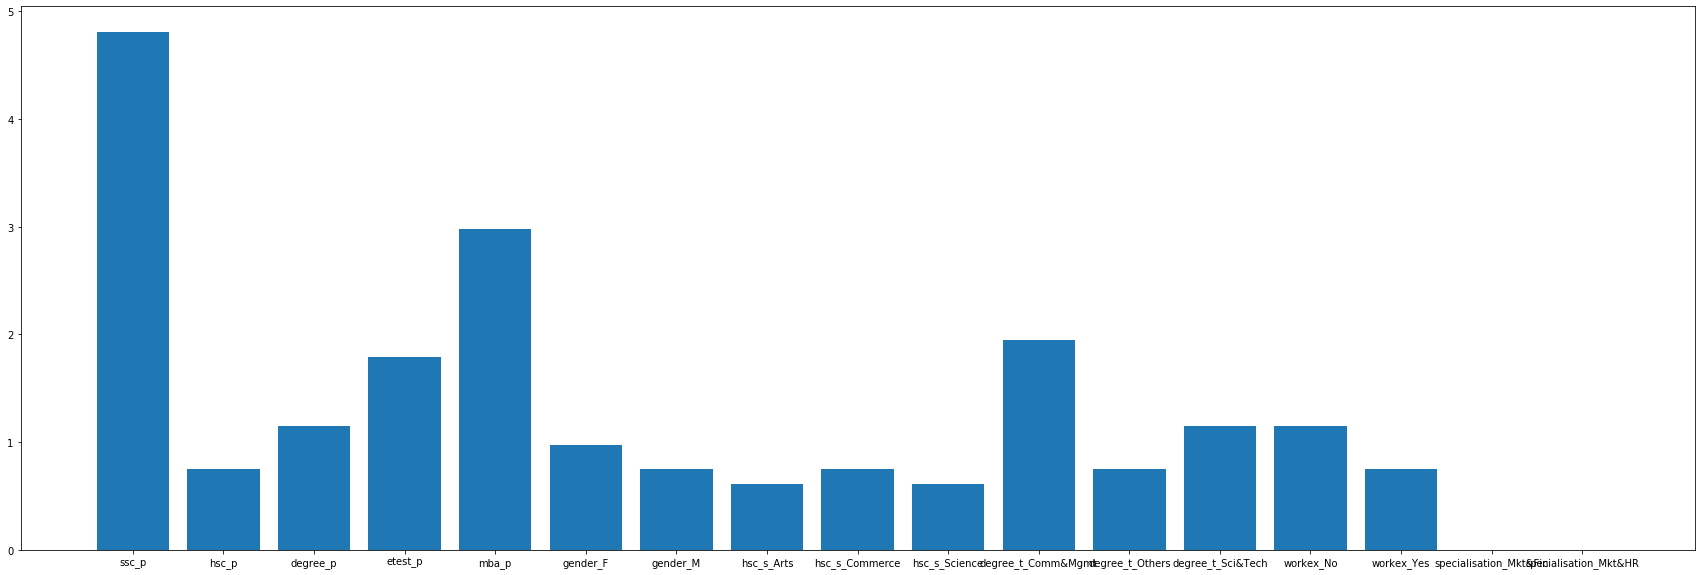

In [273]:
plt.figure(figsize=(30, 10))
plt.bar(X.columns.to_list(), perm.feature_importances_std_ * 100)
plt.show()

### Decision Tree

In [274]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [275]:
accuracy_score(y_test, y_pred)

0.7692307692307693

In [276]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       0.43      0.46      0.44        13
      Placed       0.86      0.85      0.85        52

    accuracy                           0.77        65
   macro avg       0.65      0.65      0.65        65
weighted avg       0.78      0.77      0.77        65



### Random Forest

In [277]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [278]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [279]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       0.64      0.54      0.58        13
      Placed       0.89      0.92      0.91        52

    accuracy                           0.85        65
   macro avg       0.76      0.73      0.74        65
weighted avg       0.84      0.85      0.84        65



### Check Feature Importance

In [280]:
rows = list(X.columns)
imp = pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows), 3))
imp.columns = ["Classifier", "Feature", "Importance"]

for index in range(0, 2*len(rows), 2):
    imp.iloc[index] = ["DecisionTree", rows[index//2], (100*dtree.feature_importances_[index//2])]
    imp.iloc[index + 1] = ["RandomForest", rows[index//2], (100*random_forest.feature_importances_[index//2])]

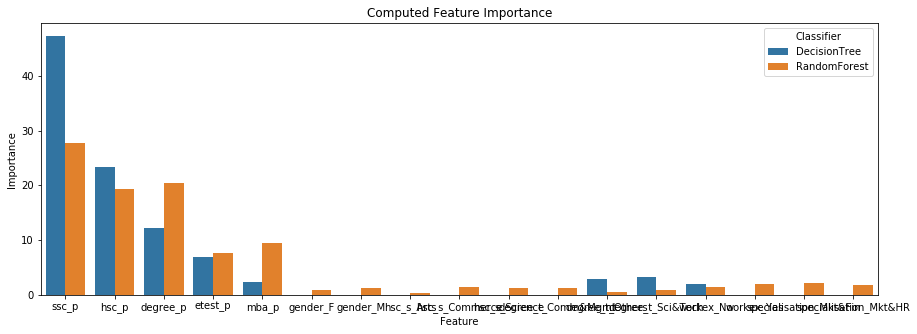

In [281]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", hue="Classifier", data=imp)
plt.title("Computed Feature Importance")
plt.show()

### Random Forest w/o One Hot Encoding

In [287]:
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p']]

In [290]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3)

In [291]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [292]:
accuracy_score(y_test, y_pred)

0.8615384615384616

In [293]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       1.00      0.59      0.74        22
      Placed       0.83      1.00      0.91        43

    accuracy                           0.86        65
   macro avg       0.91      0.80      0.82        65
weighted avg       0.89      0.86      0.85        65

